In [185]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose


In [186]:
df_pol_all = pd.read_csv(r'coronanet_release_allvars.csv', parse_dates = ['date_start'])
df = pd.read_csv(r'owid-covid-data_11-1.csv', parse_dates = ['date'])


In [187]:
df_pol = df_pol_all[['policy_id', 'correct_type', 'date_start', 'country', 'ISO_A3', 'init_country_level', 'type', 'compliance']]


In [188]:
#Shows number of unique policy types
df_pol['type'].nunique()

19

In [189]:
#drops all dates in the COVID database with no new cases recorded
df = df.dropna(subset=['new_cases'])

First, I'll do some tests on the data for the United States as a proof of concept for what I wish to do. I'll first obtain all rows with data from the United States, make a dataframe with only new cases and the dates of the new cases and perform a simple decomposition on them to get a general, smoothed trendline for new cases. I'll also start to incorporate grouped values in order to build the base of my metric for the policies: average change in new cases for 7 and 28-day periods.

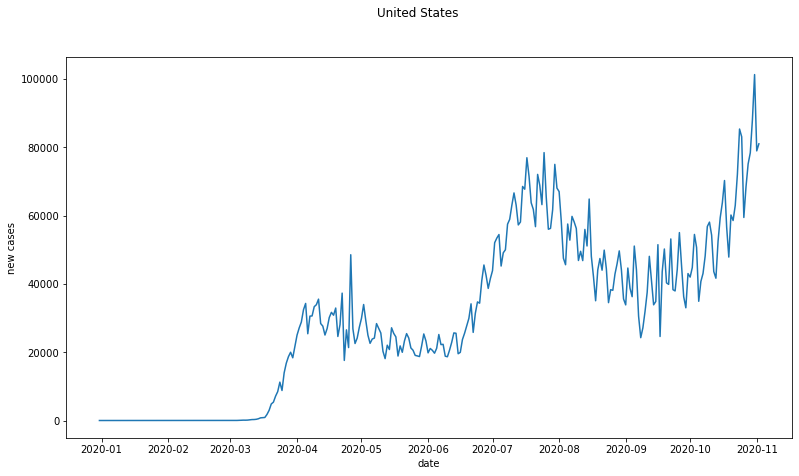

In [190]:
df_US = df[df['location'] == 'United States']
plt.figure(figsize=(13,7))
plt.suptitle('United States')
plt.plot(df_US['date'], df_US['new_cases'])
plt.xlabel('date')
plt.ylabel('new cases')
plt.show()

In [191]:
#From a prior workup, the top 10 most populated countries are: 
# top_pop = ['CHN', 'IND', 'USA', 'IDN', 'PAK', 'BRA', 'NGA', 'BGD', 'RUS', 'MEX']
top_pop = ['CHN', 'IND', 'USA']

In [192]:
df_US_cases = df_US[['date' ,'new_cases']]
df_US_cases = df_US_cases.set_index('date')
df_US_cases['change in new cases'] = df_US_cases['new_cases'].diff()
df_US_cases

,new_cases,change in new cases
date,,
2019-12-31,0.0,NaN
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0
2020-01-05,0.0,0.0
2020-01-06,0.0,0.0
2020-01-07,0.0,0.0
2020-01-08,0.0,0.0


In [193]:
grouped_US_cases_7day = df_US_cases.groupby(pd.Grouper(freq='W')).mean()
grouped_US_cases_7day = grouped_US_cases_7day.rename(columns={'change in new cases': '7-day case change'})
grouped_US_cases_7day



,new_cases,7-day case change
date,,
2020-01-05,0.000000,0.000000
2020-01-12,0.000000,0.000000
2020-01-19,0.000000,0.000000
2020-01-26,0.285714,0.000000
2020-02-02,0.857143,0.142857
2020-02-09,0.571429,-0.142857
2020-02-16,0.428571,0.000000
2020-02-23,2.857143,0.000000
2020-03-01,4.857143,0.428571


Next, I'll start to use the policy dataset to obtain the starting date, ISO code, and policy type for each country.

In [194]:
df_pol_US = df_pol[df_pol['country'] == 'United States of America']
df_pol_US = df_pol_US.set_index('date_start')
df_pol_US['date_start'] = df_pol_US.index
df_pol_US

,policy_id,correct_type,country,ISO_A3,init_country_level,type,compliance,date_start
date_start,,,,,,,,
2020-01-22,5268950,original,United States of America,USA,Provincial,Health Monitoring,Voluntary/Recommended but No Penalties,2020-01-22
2020-01-23,4532513,original,United States of America,USA,Provincial,Public Awareness Measures,Voluntary/Recommended but No Penalties,2020-01-23
2020-01-24,4818187,original,United States of America,USA,Provincial,Public Awareness Measures,Mandatory (Unspecified/Implied),2020-01-24
2020-01-24,8404605,original,United States of America,USA,Provincial,Public Awareness Measures,Mandatory (Unspecified/Implied),2020-01-24
2020-01-26,810670,original,United States of America,USA,Provincial,Public Awareness Measures,Mandatory (Unspecified/Implied),2020-01-26
...,...,...,...,...,...,...,...,...
2020-08-13,3874095,original,United States of America,USA,Municipal,Health Testing,Mandatory (Unspecified/Implied),2020-08-13
2024-05-29,3889409,original,United States of America,USA,Provincial,"New Task Force, Bureau or Administrative Confi...",Mandatory (Unspecified/Implied),2024-05-29
2019-12-31,1747784,original,United States of America,USA,Provincial,"New Task Force, Bureau or Administrative Confi...",Mandatory (Unspecified/Implied),2019-12-31


In [195]:
#I wanted to use national cases only, as they likely held more sway on the national COVID-19 statistics
df_pol_US_nat = df_pol_US[df_pol_US['init_country_level'] == 'National']
df_pol_US_list = df_pol_US_nat['type'].unique()
df_pol_US_list = df_pol_US_list.tolist()
df_pol_US_list

['Declaration of Emergency',
 'New Task Force, Bureau or Administrative Configuration',
 'External Border Restrictions',
 'Health Resources',
 'Other Policy Not Listed Above',
 'Public Awareness Measures',
 'Restriction and Regulation of Government Services',
 'Health Testing',
 'Restrictions of Mass Gatherings',
 'Social Distancing',
 'Lockdown',
 'Hygiene']

In [196]:
#This is just a basic method of grouping for the policy dataframe. Each column proved to me that I could use any column and obtain a count of policies for that given week.
grouped_df_US_pol = df_pol_US_nat.groupby(pd.Grouper(freq='W')).count()

grouped_df_US_pol

,policy_id,correct_type,country,ISO_A3,init_country_level,type,compliance,date_start
date_start,,,,,,,,
2020-01-26,1,1,1,1,1,1,1,1
2020-02-02,4,4,4,4,4,4,4,4
2020-02-09,0,0,0,0,0,0,0,0
2020-02-16,1,1,1,1,1,1,1,1
2020-02-23,1,1,1,1,1,1,1,1
2020-03-01,3,3,3,3,3,3,3,3
2020-03-08,3,3,3,3,3,3,3,3
2020-03-15,10,10,10,10,10,10,10,10
2020-03-22,13,13,13,13,13,13,13,13


In [197]:
df_final_US = grouped_df_US_pol.join(grouped_US_cases_7day['7-day case change'])
df_final_US = df_final_US.join(grouped_US_cases_month['month case change'])

df_final_US

,policy_id,correct_type,country,ISO_A3,init_country_level,type,compliance,date_start,7-day case change,month case change
date_start,,,,,,,,,,
2020-01-26,1,1,1,1,1,1,1,1,0.000000,NaN
2020-02-02,4,4,4,4,4,4,4,4,0.142857,NaN
2020-02-09,0,0,0,0,0,0,0,0,-0.142857,NaN
2020-02-16,1,1,1,1,1,1,1,1,0.000000,NaN
2020-02-23,1,1,1,1,1,1,1,1,0.000000,NaN
2020-03-01,3,3,3,3,3,3,3,3,0.428571,NaN
2020-03-08,3,3,3,3,3,3,3,3,13.142857,NaN
2020-03-15,10,10,10,10,10,10,10,10,97.428571,NaN
2020-03-22,13,13,13,13,13,13,13,13,906.571429,NaN


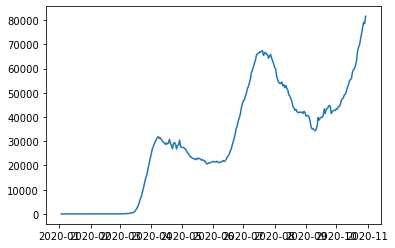

In [198]:
#period of 7 used to get weekly trends, since weekends may be hotspot times
#additive since there doesn't appear to be any seasonality
decomp_US = seasonal_decompose(df_US_cases['new_cases'], model='additive', period=7)
# decomp_US.trend.plot()
plt.plot(decomp_US.trend)
plt.show()

In [199]:
#Here I just wanted to see if I could append the trend for each policy date. If I can do this, then I can superimpose policy-related datasets on the trend that I obtained for the new cases trend. 
print(type(decomp_US.trend))
print(type(df_pol_US_nat))
df_US_decomp = decomp_US.trend.to_frame()
df_US_decomp['Date'] = decomp_US.trend.index

df_US_final = df_pol_US_nat.join(df_US_decomp['trend'])
df_US_final

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,policy_id,correct_type,country,ISO_A3,init_country_level,type,compliance,date_start,trend
2020-01-21,5889302,original,United States of America,USA,National,"New Task Force, Bureau or Administrative Confi...",Mandatory (Unspecified/Implied),2020-01-21,0.142857
2020-01-27,7983802,original,United States of America,USA,National,Declaration of Emergency,Mandatory (Unspecified/Implied),2020-01-27,0.571429
2020-01-29,6167271,original,United States of America,USA,National,"New Task Force, Bureau or Administrative Confi...",Mandatory (Unspecified/Implied),2020-01-29,0.714286
2020-01-31,7179112,original,United States of America,USA,National,External Border Restrictions,Mandatory (Unspecified/Implied),2020-01-31,0.857143
2020-02-02,6672217,correction,United States of America,USA,National,External Border Restrictions,Voluntary/Recommended but No Penalties,2020-02-02,0.857143
2020-02-15,3967471,original,United States of America,USA,National,Health Resources,Mandatory (Unspecified/Implied),2020-02-15,0.285714
2020-02-18,1215282,original,United States of America,USA,National,Other Policy Not Listed Above,Voluntary/Recommended but No Penalties,2020-02-18,0.142857
2020-02-27,7453220,correction,United States of America,USA,National,"New Task Force, Bureau or Administrative Confi...",Mandatory (Unspecified/Implied),2020-02-27,4.857143
2020-02-28,4951252,original,United States of America,USA,National,Public Awareness Measures,Voluntary/Recommended but No Penalties,2020-02-28,7.714286
2020-02-29,774849,original,United States of America,USA,National,External Border Restrictions,Mandatory (Unspecified/Implied),2020-02-29,7.142857


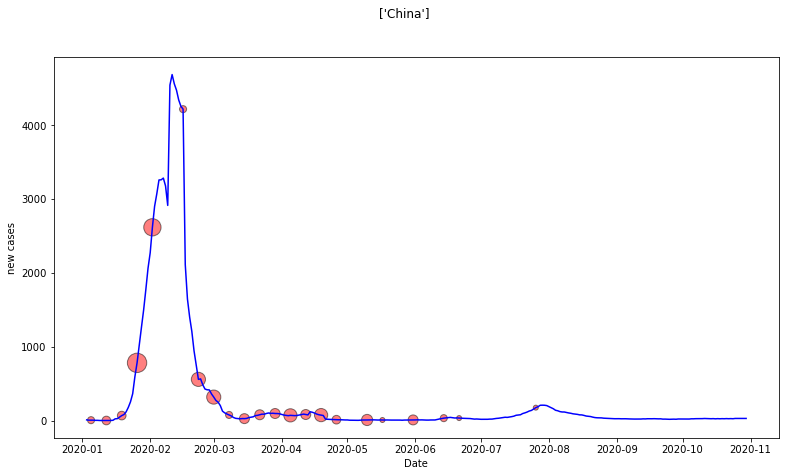

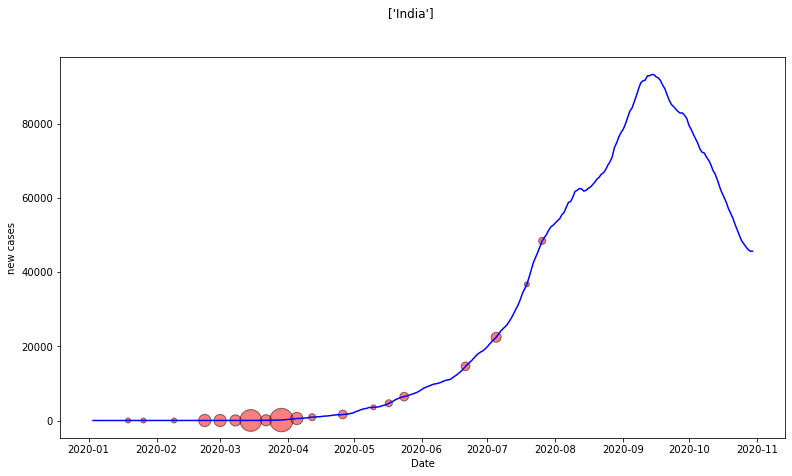

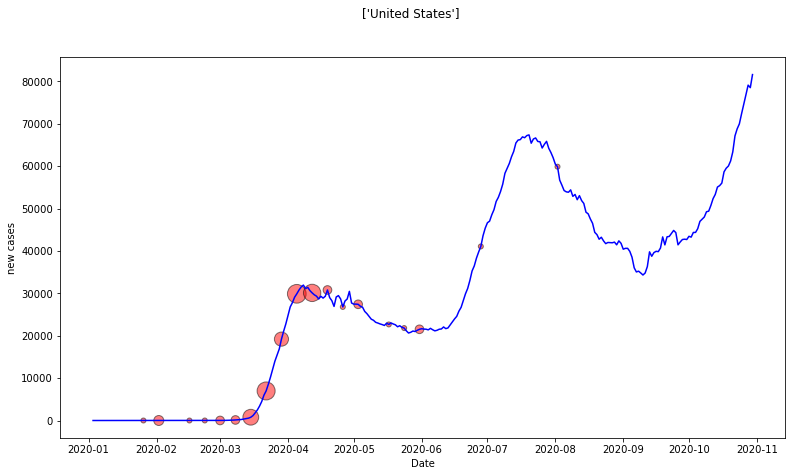

,count,7-day case change,28-day change,trend
date_start,,,,
2020-01-26,1,0.000000,2.269990e-13,0.571429
2020-02-02,4,0.142857,2.269990e-13,0.857143
2020-02-09,0,-0.142857,7.142857e-02,0.285714
2020-02-16,1,0.000000,3.392857e+00,0.285714
2020-02-23,1,0.000000,2.775000e+01,5.428571
2020-03-01,3,0.428571,2.543929e+02,10.285714
2020-03-08,3,13.142857,7.134286e+02,128.571429
2020-03-15,10,97.428571,1.220607e+03,771.714286
2020-03-22,13,906.571429,9.862143e+02,6972.000000


In [200]:
#I'll use top 3 populated countries for my study
#I'll want to bin policies by week 
for countries in top_pop:
    df_country = df[df['iso_code'] == countries]
    df_cases = df_country[['date' ,'new_cases']]
    df_cases = df_cases.set_index('date')
    
    df_pol_country = df_pol[df_pol['ISO_A3'] == countries]
    df_pol_country = df_pol_country.set_index('date_start')
    df_pol_country['date_start'] = df_pol_country.index
    df_pol_nat = df_pol_country[df_pol_country['init_country_level'] == 'National']
    df_pol_nat2 = df_pol_nat['date_start']
    grouped_pol_nat = df_pol_nat2.groupby(pd.Grouper(freq='W')).count()
    grouped_pol_nat = grouped_pol_nat.to_frame()
    grouped_pol_nat = grouped_pol_nat.rename(columns={'date_start': 'count'})
    
    df_cases['change in new cases'] = df_cases['new_cases'].diff()
    grouped_cases = df_cases.groupby(pd.Grouper(freq='W')).mean()
    grouped_cases = grouped_cases.rename(columns={'change in new cases': '7-day case change'})
    grouped_cases['28-day change'] = grouped_cases['7-day case change'][::-1].rolling(window='28D', min_periods=4).mean()[::-1]
    grouped_cases = grouped_cases.rename(columns={'new_cases': 'Avg. new cases'})
    df_final = grouped_pol_nat.join(grouped_cases[['7-day case change','28-day change']])

    
    decomp = seasonal_decompose(df_cases['new_cases'], model='additive', period=7)
    df_decomp = decomp.trend.to_frame()
    df_decomp['Date'] = decomp.trend.index
    df_final = df_final.join(df_decomp['trend'])
    
    plt.figure(figsize=(13,7))
    plt.plot(df_decomp['Date'], df_decomp['trend'], color='blue')
    plt.scatter(df_final.index, df_final['trend'], color = 'red', s=df_final['count']*25, alpha = 0.5, edgecolors = 'black')
    plt.xlabel('Date')
    plt.ylabel('new cases')
    plt.suptitle(df_country['location'].unique().tolist())
    plt.savefig(countries, transparent='true', dpi=100)
    plt.show()
    csv_name = '{}.csv'.format(countries)
    df_final.to_csv(csv_name)
    
df_final

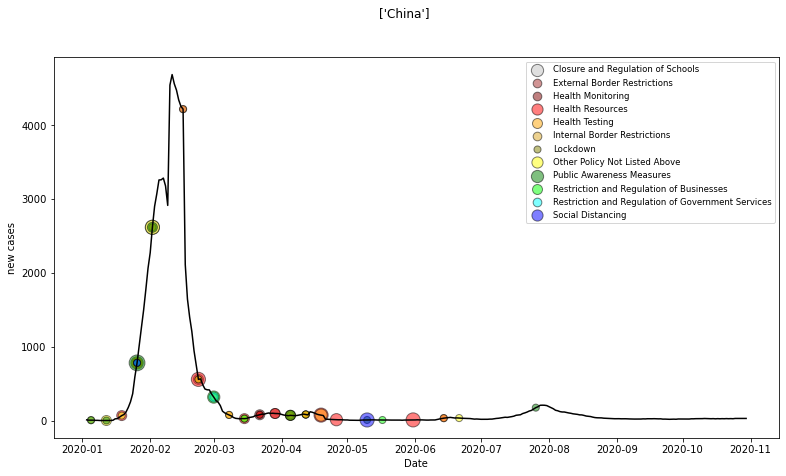

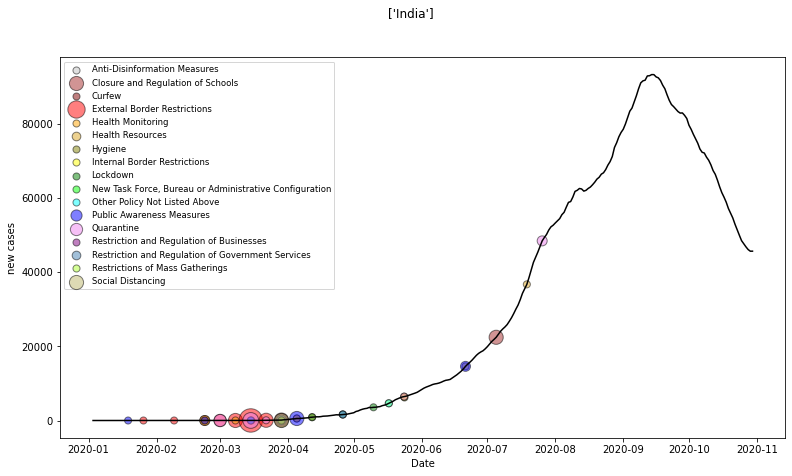

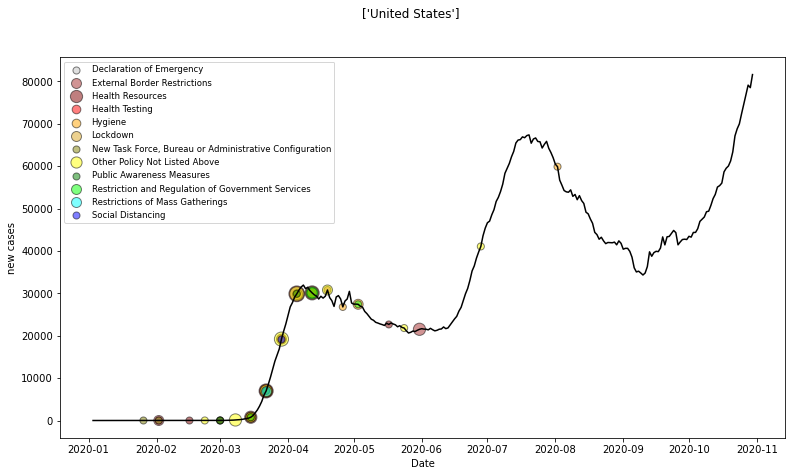

In [201]:
test =['USA']
for countries in top_pop:
    df_country = df[df['iso_code'] == countries]
    df_cases = df_country[['date' ,'new_cases']]
    df_cases = df_cases.set_index('date')
    
    df_pol_country = df_pol[df_pol['ISO_A3'] == countries]
    df_pol_country = df_pol_country.set_index('date_start')
    df_pol_country['date_start'] = df_pol_country.index
    df_pol_nat = df_pol_country[df_pol_country['init_country_level'] == 'National']
    df_pol_nat2 = df_pol_nat[['date_start', 'type']]
    grouped_pol_nat = df_pol_nat2.groupby(['type', pd.Grouper(freq='W')]).count()
    grouped_pol_nat = grouped_pol_nat.rename(columns={'date_start': 'count'})
    grouped_pol_nat = grouped_pol_nat.reset_index()
    type_list = grouped_pol_nat['type'].unique()
    type_list = type_list.tolist()
    
    decomp = seasonal_decompose(df_cases['new_cases'], model='additive', period=7)
    df_decomp = decomp.trend.to_frame()
    df_decomp['Date'] = decomp.trend.index
    
    colors = itertools.cycle(['silver', 'brown', 'maroon', 'red', 'orange', 'goldenrod', 'olive', 'yellow', 'green', 'lime', 'cyan', 'blue', 'violet', 'purple', 'steelblue', 'greenyellow', 'darkkhaki', 'peru', 'pink'])
    plt.figure(figsize=(13,7))
    plt.plot(df_decomp['Date'], df_decomp['trend'], color='black')
    for policy in type_list:
        df_type = grouped_pol_nat[grouped_pol_nat['type'] == policy]
        df_type = df_type.set_index('date_start')
        df_final_type = df_type.join(df_decomp['trend'])
        df_final_type['date_start'] = df_final_type.index
        plt.scatter(df_final_type['date_start'], df_final_type['trend'], label=policy, color = next(colors), s=df_final_type['count']*50, alpha = 0.5, edgecolors = 'black')

    plt.xlabel('Date')
    plt.ylabel('new cases')
    if countries == 'CHN':
        plt.legend(loc='upper right', prop={'size': 8.5})
    else:
        plt.legend(loc='upper left', prop={'size': 8.5})
    plt.suptitle(df_country['location'].unique().tolist())
    filename = '{}_different_types'.format(countries)
    plt.savefig(filename, transparent='true', dpi=100)
    plt.show()
    
